<a href="https://colab.research.google.com/github/guilhermefpo/CodeWave/blob/main/Codewave_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install sidrapy

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from google.colab import drive

Este código realiza a extração de tabelas HTML diretamente do site da prefeitura. A ferramenta acessa a página web e identifica todas as tabelas disponíveis no código.


In [ ]:
url='https://www.sjc.sp.gov.br/servicos/governanca/populacao/'

In [ ]:
df=pd.read_html(url,header=0)
lista_popu_certa=[]
popu_regi=df[3]
popu_regi['População (2022)']=popu_regi['População (2022)'].astype('float64')

for x in popu_regi['População (2022)']:

    lista_popu_certa.append(x*1000)

popu_regi['População (2022)']=lista_popu_certa
popu_regi=popu_regi.drop(8)
popu_regi_grap=px.bar(popu_regi, x="Região", y="População (2022)", title="População por Região")

popu_regi_grap



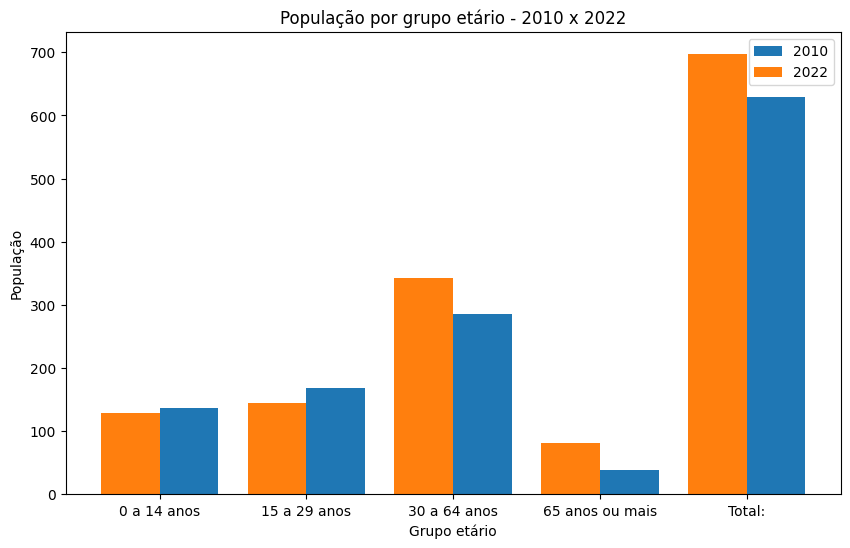

In [ ]:




df1 = df[1].copy()

# remove a linha "Total"
df1 = df1[df1["Grupo etário"] != "Total"]

# Convert columns to numeric
df1["2010"] = pd.to_numeric(df1["2010"])
df1["2022"] = pd.to_numeric(df1["2022"])


# gráfico de barras agrupadas
plt.figure(figsize=(10,6))
plt.bar(df1["Grupo etário"], df1["2010"], width=0.4, label="2010", align="edge")
plt.bar(df1["Grupo etário"], df1["2022"], width=-0.4, label="2022", align="edge")

plt.title("População por grupo etário - 2010 x 2022")
plt.ylabel("População")
plt.xlabel("Grupo etário")
plt.legend()
plt.show()

In [ ]:

gra_porgrupetario2010x2022 = px.bar(df1, x="Grupo etário", y=["2010", "2022"], barmode="group", title="População por grupo etário - 2010 x 2022")
gra_porgrupetario2010x2022

In [ ]:
#consertando os numeros da coluna Homens
lis_h=[]
grup_quinhental=df[2]
for x in grup_quinhental['Homens (2022)']:
  if x < 100 and x!=12:
    x=x*1000
    lis_h.append(x)
  else:
    lis_h.append(x)
grup_quinhental['Homens (2022)']=lis_h
#consertando os numeros da coluna Mulheres
lis_m=[]
for x in grup_quinhental['Mulheres (2022)']:
  if x < 100 and x!=73:
    x=x*1000
    lis_m.append(x)
  else:
    lis_m.append(x)
grup_quinhental['Mulheres (2022)']=lis_m

#Fazendo o grafico
grap_quinhentalporsex = px.bar(grup_quinhental, x="Grupo quinquenal", y=["Homens (2022)", "Mulheres (2022)"], barmode="group", title="População por grupo quinzenal - Homens x Mulheres")
grap_quinhentalporsex


In [ ]:

lista_coorec=[]


domi_regi=df[3]
domi_regi['Domicílios particulares (2022)']=domi_regi['Domicílios particulares (2022)'].astype('float64')
for x in domi_regi['Domicílios particulares (2022)']:
  if x!=754:
    lista_coorec.append(x*1000)
  else:
    lista_coorec.append(x)
domi_regi['Domicílios particulares (2022)']=lista_coorec
domi_regi=domi_regi.drop(8)
domi_regi_grap=px.bar(domi_regi, x="Região", y="Domicílios particulares (2022)", title="Domicílios particulares por Região")

domi_regi_grap





In [ ]:
p=df[4]
l=[]
for x in p['População (2022)']:
  if x < 100:
    x=x*1000
    l.append(x)
  else:
    l.append(x)
p['População(2022)']=l




popu_set = px.bar(p, x="Setor socioeconômico/área", y='População(2022)', title="População")
popu_set





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
estado = pd.read_csv("/content/drive/MyDrive/CodeWave/perfil_eleitor_secao_2022_SP.csv",
                 usecols = '''NR_ZONA NR_SECAO NM_MUNICIPIO DS_FAIXA_ETARIA DS_ESTADO_CIVIL DS_GRAU_ESCOLARIDADE
                 QT_ELEITORES_INC_NM_SOCIAL QT_ELEITORES_PERFIL'''.split(),
                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
municipio = estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
municipio = municipio.drop(columns = 'NM_MUNICIPIO')


In [ ]:
#criando tabela da faixa etaria
FaixaEtaria = municipio.groupby(['DS_FAIXA_ETARIA'])['QT_ELEITORES_PERFIL'].sum()
FaixaEtaria

,QT_ELEITORES_PERFIL
DS_FAIXA_ETARIA,
100 anos ou mais,582
16 anos,2015
17 anos,3397
18 anos,6819
19 anos,7581
20 anos,8460
21 a 24 anos,40614
25 a 29 anos,52650
30 a 34 anos,55945


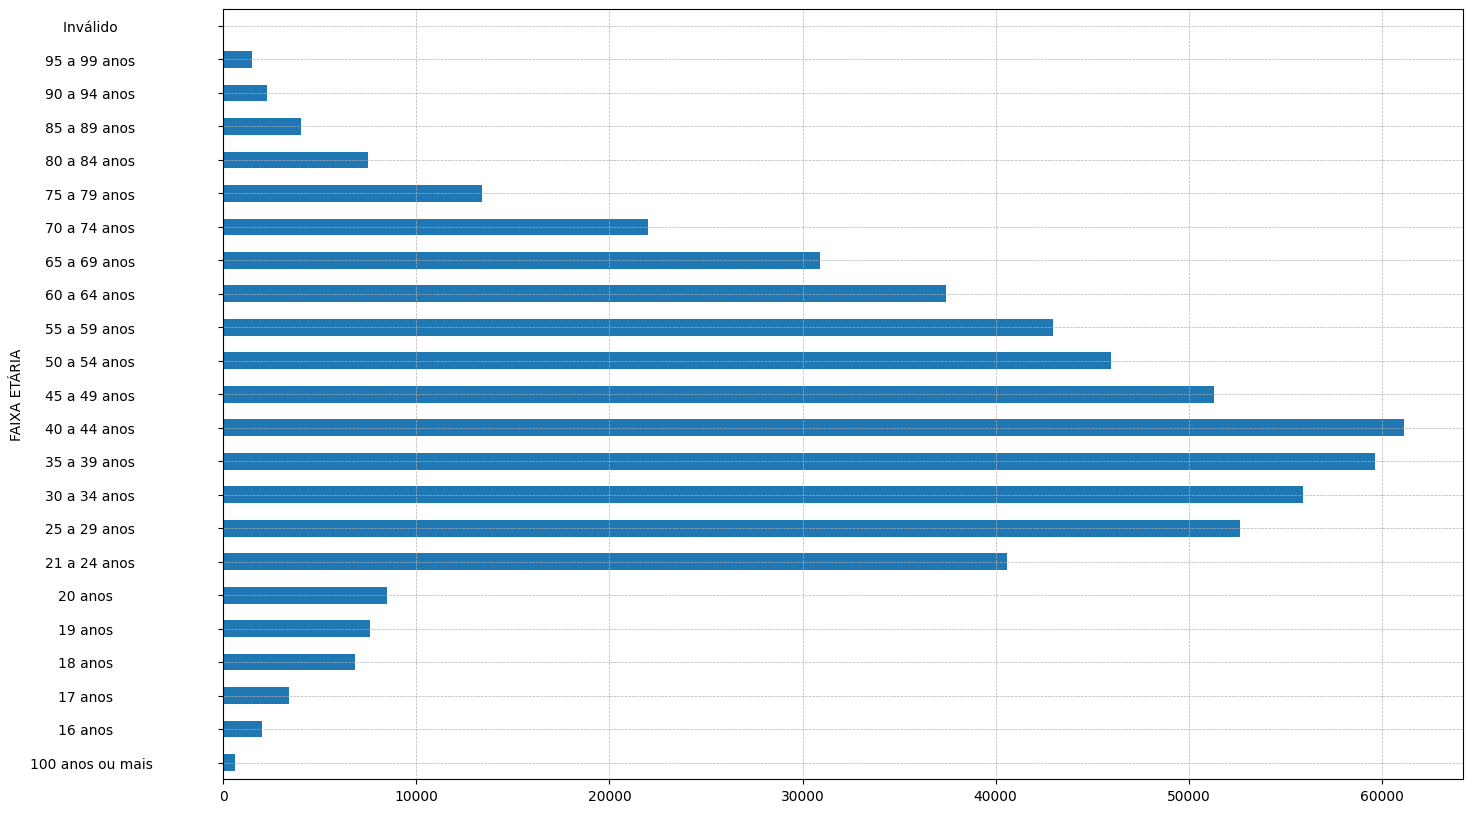

In [ ]:
FaixaEtaria.plot(kind='barh', figsize=(16,10))
plt.ylabel('FAIXA ETÁRIA')
plt.grid(linestyle = '--', linewidth = 0.5)

In [ ]:
Jovem = FaixaEtaria[1:8]
Adulto = FaixaEtaria[8:14]
Idoso = FaixaEtaria[14:22]


In [ ]:
FaixasIdade = pd.DataFrame({'SÃO JOSÉ DOS CAMPOS':[Jovem.sum(), Adulto.sum(), Idoso.sum() + int(FaixaEtaria[0])]},
                        #somando idosos acima de 100 anos que estão no ínício
                        index = ['Jovens até 29 anos', 'Adultos', 'Idosos a partir de 60'])
FaixasIdade


/tmp/ipython-input-2988103954.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



,SÃO JOSÉ DOS CAMPOS
Jovens até 29 anos,121536
Adultos,317012
Idosos a partir de 60,119590


In [ ]:
jovens = {}
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    jovens[zona] = result[1:8].sum()
for zona in sorted(jovens, key=lambda x:jovens[x], reverse = True):
    display (f'Zona eleitoral {zona}: {jovens[zona]}')



'Zona eleitoral 412: 41047'

'Zona eleitoral 411: 33256'

'Zona eleitoral 127: 28519'

'Zona eleitoral 282: 18714'

In [ ]:
idosos = {}
list_zona=[]
list_idosos=[]
for zona in municipio.NR_ZONA.unique():
    result = municipio.query('NR_ZONA == @zona').groupby('DS_FAIXA_ETARIA')['QT_ELEITORES_PERFIL'].sum()
    idosos[zona] = result[14:22].sum() + int(result[0])
for zona in sorted(idosos, key=lambda x:idosos[x], reverse = True):
    print (f'Zona eleitoral {zona}: {idosos[zona]}')

    list_idosos.append(idosos[zona])
list_zona=['Sul','Centro e Oeste','Leste','Norte']
idosos_porregiao={
    'Zona':list_zona,
    'Idosos':list_idosos
}
grap_idosos_porzona = px.bar(idosos_porregiao, x="Zona", y="Idosos", barmode="group", title="Idosos por Zona")
grap_idosos_porzona





/tmp/ipython-input-928962055.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-928962055.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-928962055.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Zona eleitoral 412: 38167
Zona eleitoral 127: 34433
Zona eleitoral 411: 29325
Zona eleitoral 282: 17665


/tmp/ipython-input-928962055.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
Escolaridade = municipio.groupby(['DS_GRAU_ESCOLARIDADE'])['QT_ELEITORES_PERFIL'].sum().sort_values(ascending = False)

Escolaridade


,QT_ELEITORES_PERFIL
DS_GRAU_ESCOLARIDADE,
ENSINO MÉDIO COMPLETO,212650
SUPERIOR COMPLETO,117731
ENSINO FUNDAMENTAL INCOMPLETO,77682
ENSINO MÉDIO INCOMPLETO,59022
ENSINO FUNDAMENTAL COMPLETO,37115
SUPERIOR INCOMPLETO,36232
LÊ E ESCREVE,10652
ANALFABETO,7056


In [ ]:
#Dados de creches por região
file_id="1ojsNUvtxh7-xEkGkN7hs8-8QZH5kabCj"
url=f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url,

                 sep=";", on_bad_lines = 'skip', encoding='Latin 1')
bairros_sjc_certos = [
    "JARDIM AMÉRICA",
    "VILA BETÂNIA",
    "RESIDENCIAL PINHEIRINHO DOS PALMARES II",
    "JARDIM ALVORADA",
    "CAMPO DOS ALEMÃES",
    "JARDIM AMÉRICA",
    "JARDIM SÃO DIMAS",
    "ALTO DA PONTE",
    "VILA MONTERREY",
    "LOTEAMENTO SANTA EDWIGES",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "RESIDENCIAL PINHEIRINHO DOS PALMARES II",
    "JARDIM ESPLANADA II",
    "JARDIM ORIENTE",
    "BAIRRINHO",
    "SETVILLE ALTOS DE SÃO JOSÉ",
    "VILA BETÂNIA",
    "JARDIM SUL",
    "JARDIM SATÉLITE",
    "JARDIM NOVA AMÉRICA",
    "JARDIM ORIENTE",
    "JARDIM DAS INDÚSTRIAS",
    "PARQUE NOVO HORIZONTE",
    "JARDIM VENEZA",
    "MONTE CASTELO",
    "PARQUE INDUSTRIAL",
    "JARDIM LIMOEIRO",
    "JARDIM PARAÍSO",
    "JARDIM ESPLANADA II",
    "RESIDENCIAL UNIÃO",
    "JARDIM ISMÊNIA",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM MARGARETH",
    "PUTIM",
    "SÃO JOSÉ DOS CAMPOS",
    "URBANOVA",
    "JARDIM PAULISTA",
    "CONJUNTO RESIDENCIAL VALE DOS PINHEIROS",
    "CIDADE MORUMBI",
    "JARDIM NOVA AMÉRICA",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM DAS PAINEIRAS II",
    "JARDIM MESQUITA",
    "VILA IRACEMA",
    "CONDOMÍNIO RESIDENCIAL MÔNACO",
    "JARDIM SANTA HERMÍNIA",
    "JARDIM SÃO DIMAS",
    "JARDIM ESPLANADA II",
    "PORTAL DOS PÁSSAROS",
    "JARDIM DAS COLINAS",
    "JARDIM ESPLANADA",
    "JARDIM IMPERIAL",
    "JARDIM SANTA HERMÍNIA",
    "SETVILLE ALTOS DE SÃO JOSÉ",
    "CENTRO",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "PARQUE NOVO HORIZONTE",
    "JARDIM ORIENTE",
    "JARDIM VALPARAÍBA",
    "CIDADE MORUMBI",
    "CHÁCARAS POUSADA DO VALE",
    "ALTO DA PONTE",
    "RESIDENCIAL ARMANDO MOREIRA RIGHI",
    "CONJUNTO PAPA JOÃO PAULO II",
    "VILA DO TESOURO",
    "CAMPO DOS ALEMÃES",
    "JARDIM SATÉLITE",
    "VILA TATETUBA",
    "MONTE CASTELO",
    "CENTRO",
    "JARDIM SÃO JOSÉ II",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM MOTORAMA",
    "JARDIM AMÉRICA",
    "BOA VISTA",
    "VILA SÃO GERALDO",
    "VILA SINHA",
    "MONTE CASTELO",
    "VILA CÂNDIDA",
    "JARDIM SATÉLITE",
    "VILA INDUSTRIAL",
    "JARDIM DA GRANJA",
    "EUGÊNIO DE MELO",
    "VILA NAIR",
    "CENTRO",
    "ALTO DA PONTE",
    "VILA PAIVA",
    "SANTANA",
    "CENTRO DISTRITO DE SÃO FRANCISCO XAVIER",
    "SANTANA",
    "PARQUE INDUSTRIAL",
    "JARDIM SÃO DIMAS",
    "VILA DAS ACÁCIAS",
    "CENTRO",
    "MONTE CASTELO",
    "VILA ALEXANDRINA",
    "VILA TATETUBA",
    "JARDIM SÃO DIMAS",
    "CAMPOS DE SÃO JOSÉ",
    "MONTE CASTELO",
    "JARDIM ANHEMBÍ",
    "JARDIM SATÉLITE",
    "CHÁCARAS REUNIDAS",
    "VILA DO TESOURO",
    "JARDIM IMPERIAL",
    "BUQUIRINHA",
    "JARDIM SATÉLITE",
    "JARDIM AMERICANO",
    "PARQUE NOVO HORIZONTE",
    "JARDIM ORIENTE",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "VILA SÃO BENTO",
    "CIDADE MORUMBI",
    "VALE DOS PINHEIROS",
    "VILA INDUSTRIAL",
    "CONJUNTO RESIDENCIAL ELMANO FERREIRA VELOSO",
    "PARQUE INDUSTRIAL",
    "BOSQUE DOS EUCALIPTOS",
    "VILA IRACEMA",
    "JARDIM SATÉLITE",
    "VILA ADYANA",
    "CIDADE VISTA VERDE",
    "VILA INDUSTRIAL",
    "VILA NOVA CONCEIÇÃO",
    "ALTO DA PONTE",
    "JARDIM DA GRANJA",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM OSWALDO CRUZ",
    "JARDIM SATÉLITE",
    "PARQUE INDUSTRIAL",
    "JARDIM PARAÍSO DO SOL",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM ALTOS DE SANTANA",
    "BUQUIRINHA",
    "JARDIM ANHEMBÍ",
    "JARDIM LIMOEIRO",
    "CONJUNTO RESIDENCIAL DOM PEDRO I",
    "JARDIM SÃO JUDAS TADEU",
    "JARDIM POR DO SOL",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM SOUTO",
    "JARDIM SÃO LEOPOLDO",
    "JARDIM ALTOS DE SANTANA",
    "VILA INDUSTRIAL",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "CONJUNTO RESIDENCIAL DOM PEDRO I",
    "CAMPOS DE SÃO JOSÉ",
    "CHÁCARAS POUSADA DO VALE",
    "VILA MARIA",
    "CAMPOS DE SÃO JOSÉ",
    "RIO COMPRIDO",
    "CONJUNTO RESIDENCIAL VALE DOS PINHEIROS",
    "JARDIM COLONIAL",
    "CENTRO",
    "PARQUE NOVA ESPERANÇA",
    "JARDIM DAS CEREJEIRAS",
    "PARQUE INTERLAGOS",
    "BOSQUE DOS EUCALIPTOS",
    "VILA ICARAÍ",
    "VILA ADYANA",
    "JARDIM SANTA MATILDE",
    "JARDIM TORRÃO DE OURO",
    "JARDIM ESPLANADA",
    "FREITAS",
    "JARDIM SÃO JOSÉ II",
    "JARDIM SATÉLITE",
    "PARQUE INDUSTRIAL",
    "JARDIM ORIENTE",
    "JARDIM VALE DO SOL",
    "SANTANA",
    "JARDIM SÃO DIMAS",
    "JARDIM MOTORAMA",
    "JARDIM DAS INDÚSTRIAS",
    "SANTANA",
    "VILA MARIA",
    "JARDIM AEROPORTO",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "VILA TATETUBA",
    "VILA NOVA CRISTINA",
    "JARDIM SATÉLITE",
    "PARQUE NOVO HORIZONTE",
    "JARDIM ESTORIL",
    "VILA INDUSTRIAL",
    "CIDADE MORUMBI",
    "SANTANA",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM SANTA MADALENA",
    "CHÁCARAS REUNIDAS",
    "JARDIM VENEZA",
    "JARDIM SANTA INÊS I",
    "JARDIM DAS FLORES",
    "JARDIM SATÉLITE",
    "JARDIM DA GRANJA",
    "EUGÊNIO DE MELO",
    "JARDIM UIRÁ",
    "SANTANA",
    "JARDIM SÃO VICENTE",
    "VILA SÃO GERALDO",
    "VILA SÃO BENTO",
    "ALTO DA PONTE",
    "CAMPO DOS ALEMÃES",
    "JARDIM SANTO ONOFRE",
    "JARDIM SANTA FÉ",
    "JARDIM TELESPARK",
    "JARDIM AMERICANO",
    "JARDIM SANTA INÊS II",
    "JARDIM SÃO DIMAS",
    "VILA PAIVA",
    "VILA DO TESOURO",
    "MONTE CASTELO",
    "VILA VENEZIANI",
    "JARDIM COPACABANA",
    "JARDIM LIMOEIRO",
    "VILA SÃO PEDRO",
    "JARDIM VALPARAÍBA",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM APOLO I",
    "VILA ADYANA",
    "BOSQUE DOS EUCALIPTOS",
    "CENTRO",
    "JARDIM DAS COLINAS",
    "CENTRO",
    "CENTRO",
    "CENTRO",
    "JARDIM ESPLANADA",
    "SANTANA",
    "JARDIM ESPLANADA",
    "CIDADE VISTA VERDE",
    "URBANOVA",
    "TAMOIOS",
    "PERNAMBUCANA",
    "JARDIM SÃO DIMAS",
    "JARDIM SÃO DIMAS",
    "JARDIM NOVA AMÉRICA",
    "JARDIM ESPLANADA",
    "JARDIM SERIMBURA",
    "JARDIM ESPLANADA",
    "VILA EMA",
    "URBANOVA",
    "JARDIM ESPLANADA",
    "BOSQUE DOS EUCALIPTOS",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM DAS INDÚSTRIAS",
    "VILA ADYANA",
    "URBANOVA",
    "CIDADE VISTA VERDE",
    "VILA BETÂNIA",
    "FLORADAS DE SÃO JOSÉ",
    "RESIDENCIAL SOL NASCENTE",
    "BOSQUE DOS EUCALIPTOS",
    "SANTANA",
    "VILA INDUSTRIAL",
    "PARQUE INDUSTRIAL",
    "JARDIM ORIENTE",
    "JARDIM PORTUGAL",
    "FLORADAS DE SÃO JOSÉ",
    "VILA UNIDOS",
    "VILA BELA VISTA",
    "JARDIM AQUARIUS",
    "JARDIM SATÉLITE",
    "JARDIM ORIENTE",
    "VILA ALEXANDRINA",
    "JARDIM ESPLANADA",
    "VISTA VERDE",
    "JARDIM ESPLANADA",
    "JARDIM SATÉLITE",
    "JARDIM ISMÊNIA",
    "MONTE CASTELO",
    "JARDIM AMÉRICA",
    "VILA RUBI",
    "JARDIM SATÉLITE",
    "JARDIM DAS INDÚSTRIAS",
    "CHÁCARAS SÃO JOSÉ",
    "JARDIM NOVA AMÉRICA",
    "JARDIM AMÉRICA",
    "VILA EMA",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "JARDIM ISMÊNIA",
    "JARDIM OSWALDO CRUZ",
    "JARDIM SÃO DIMAS",
    "MONTE CASTELO",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "JARDIM SATÉLITE",
    "JARDIM SERIMBURA",
    "CAMPOS DE SÃO JOSÉ",
    "URBANOVA",
    "MONTE CASTELO",
    "PARQUE INTERLAGOS",
    "VILA DO TESOURO",
    "VILA MARIA",
    "VILA TATETUBA",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "PARQUE NOVO HORIZONTE",
    "ALTO DA PONTE",
    "JARDIM VALPARAÍBA",
    "CIDADE MORUMBI",
    "CAMPO DOS ALEMÃES",
    "VILA SÃO BENTO",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "JARDIM ORIENTE",
    "CONJUNTO HABITACIONAL PAPA JOÃO PAULO II",
    "JARDIM ALTOS DE SANTANA",
    "CHÁCARAS POUSADA DO VALE",
    "JARDIM SÃO JUDAS TADEU",
    "CAMPO DOS ALEMÃES",
    "RESIDENCIAL UNIÃO",
    "JARDIM CRUZEIRO DO SUL",
    "VILA ADYANA",
    "VILA BETÂNIA",
    "FLORADAS DE SÃO JOSÉ",
    "JARDIM DAS INDÚSTRIAS",
    "CENTRO",
    "JARDIM NOVA AMÉRICA",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "BOSQUE DOS EUCALIPTOS",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "JARDIM TORRÃO DE OURO",
    "PARQUE NOVO HORIZONTE",
    "JARDIM TELESPARK",
    "JARDIM MARIANA I",
    "JARDIM DAS CEREJEIRAS",
    "RESIDENCIAL BOSQUE DOS IPÊS",
    "SÃO FRANCISCO XAVIER",
    "CENTRO",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM DAS INDÚSTRIAS",
    "PARQUE INDUSTRIAL",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM SÃO JOSÉ II",
    "RESIDENCIAL TATETUBA",
    "JARDIM DA GRANJA",
    "VILA SÃO GERALDO",
    "JARDIM SATÉLITE",
    "RESIDENCIAL UNIÃO",
    "VILA MARIA",
    "CAMPO DOS ALEMÃES",
    "JARDIM MARIANA II",
    "BOSQUE DOS EUCALIPTOS",
    "VILA INDUSTRIAL",
    "VILA INDUSTRIAL",
    "CAPUAVA",
    "VILA INDUSTRIAL",
    "CONJUNTO RESIDENCIAL DOM PEDRO I",
    "JARDIM PARAÍSO DO SOL",
    "RESIDENCIAL BOSQUE DOS IPÊS",
    "VILA EMA",
    "VILA EMA",
    "JARDIM TORRÃO DE OURO",
    "CIDADE MORUMBI",
    "RESIDENCIAL JATOBÁ",
    "JARDIM ESPLANADA",
    "CONJUNTO RESIDENCIAL VALE DOS PINHEIROS",
    "JARDIM ESPLANADA",
    "JARDIM DAS INDÚSTRIAS",
    "URBANOVA",
    "PARQUE RESIDENCIAL AQUARIUS",
    "JARDIM PARARANGABA",
    "JARDIM ESPLANADA",
    "JARDIM TELESPARK",
    "EUGÊNIO DE MELO",
    "PARQUE RESIDENCIAL FLAMBOYANT",
    "MONTE CASTELO",
    "JARDIM ISMÊNIA",
    "JARDIM AMÉRICA",
    "JARDIM SATÉLITE",
    "JARDIM SATÉLITE",
    "JARDIM PORTUGAL",
    "JARDIM CASTANHEIRA",
    "JARDIM UIRÁ",
    "RIO COMPRIDO",
    "JARDIM AMÉRICA",
    "CENTRO",
    "FREITAS",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM SATÉLITE",
    "JARDIM SATÉLITE",
    "JARDIM AMERICANO",
    "URBANOVA",
    "JARDIM ORIENTE",
    "JARDIM SANTA INÊS III",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM DAS INDÚSTRIAS",
    "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
    "RESIDENCIAL GAZZO",
    "SANTANA",
    "VILA DAS ACÁCIAS",
    "BOSQUE DOS EUCALIPTOS",
    "ALTO DA PONTE",
    "CAMPO DOS ALEMÃES",
    "PARQUE INDUSTRIAL",
    "JARDIM RODOLFO",
    "PUTIM",
    "CENTRO",
    "CAMPO DOS ALEMÃES",
    "CONJUNTO RESIDENCIAL DOM PEDRO I",
    "CAMPOS DE SÃO JOSÉ",
    "PORTAL DE MINAS",
    "PARQUE INDUSTRIAL",
    "PARQUE INDUSTRIAL",
    "EUGÊNIO DE MELO",
    "EUGÊNIO DE MELO",
    "JARDIM SATÉLITE",
    "JARDIM DIAMANTE",
    "JARDIM REPÚBLICA",
    "JARDIM REPÚBLICA",
    "JARDIM SANTA LUZIA",
    "ALTOS DA VILA PAIVA",
    "JARDIM SATÉLITE",
    "CIDADE MORUMBI",
    "VILA TATETUBA",
    "JARDIM ESPLANADA",
    "VILA INDUSTRIAL",
    "PARQUE INDUSTRIAL",
    "JARDIM PAULISTA",
    "JARDIM ESPLANADA II",
    "URBANOVA",
    "JARDIM ESPLANADA II",
    "JARDIM ESPLANADA",
    "JARDIM SÃO JOSÉ II",
    "JARDIM SÃO DIMAS",
    "JARDIM DAS INDÚSTRIAS",
    "VILA INDUSTRIAL",
    "MONTE CASTELO",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM DAS CEREJEIRAS",
    "RESIDENCIAL FREI GALVÃO",
    "RESIDENCIAL ARMANDO MOREIRA RIGHI",
    "CIDADE MORUMBI",
    "JARDIM SATÉLITE",
    "SANTANA",
    "PARQUE INTERLAGOS",
    "EUGÊNIO DE MELO",
    "JARDIM SÃO VICENTE",
    "JARDIM SERIMBURA",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM ESPLANADA",
    "CENTRO",
    "CENTRO",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM SATÉLITE",
    "MONTE CASTELO",
    "EUGÊNIO DE MELO",
    "JARDIM IMPERIAL",
    "PARQUE RESIDENCIAL AQUARIUS",
    "CENTRO",
    "JARDIM SANTA HERMÍNIA",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "CIDADE MORUMBI",
    "CASTANHEIROS",
    "CENTRO",
    "JARDIM DAS INDÚSTRIAS",
    "PUTIM",
    "BOSQUE DOS EUCALIPTOS",
    "JARDIM SÃO JUDAS TADEU",
    "JARDIM DAS FLORES",
    "JARDIM NOVA MICHIGAN",
    "JARDIM SANTA INÊS II",
    "JARDIM UIRÁ",
    "JARDIM DAS INDÚSTRIAS",
    "JARDIM NOVA DETROIT",
    "FREITAS",
    "CIDADE MORUMBI",
    "CIDADE MORUMBI",
    "JARDIM SANTA HERMÍNIA",
    "BOM RETIRO",
    "JARDIM DAS CEREJEIRAS",
    "CAMPO DOS ALEMÃES",
    "JARDIM SANTA INÊS I",
    "CIDADE VISTA VERDE",
    "JARDIM CASTANHEIRA",
    "JARDIM VALE DO SOL",
    "BOSQUE DOS EUCALIPTOS",
    "CIDADE MORUMBI",
    "CAMPO DOS ALEMÃES",
    "CONJUNTO RESIDENCIAL GALO BRANCO",
    "CONJUNTO RESIDENCIAL DOM PEDRO I",
    "CAMPO DOS ALEMÃES",
    "JARDIM SÃO LEOPOLDO",
    "JARDIM SÃO JUDAS TADEU",
    "VILA NOVA CRISTINA",
    "MONTE CASTELO"
]


df['NO_BAIRRO']=bairros_sjc_certos

filtro=df[df['IN_MED']==1]

colunas = list(filtro.columns)


bairros_por_regiao = {
    "SUL": [
        "JARDIM AMÉRICA", "CAMPO DOS ALEMÃES", "JARDIM VENEZA", "LOTEAMENTO SANTA EDWIGES",
        "JARDIM ORIENTE", "JARDIM SUL", "JARDIM SATÉLITE", "PARQUE INDUSTRIAL",
        "JARDIM PARAÍSO", "RESIDENCIAL UNIÃO", "CIDADE MORUMBI", "BOSQUE DOS EUCALIPTOS",
        "JARDIM MESQUITA", "JARDIM IMPERIAL", "CONJUNTO RESIDENCIAL TRINTA E UM DE MARÇO",
        "CONJUNTO PAPA JOÃO PAULO II", "VILA NAIR", "VILA DAS ACÁCIAS", "JARDIM ANHEMBI",
        "CHÁCARAS REUNIDAS", "VILA SÃO BENTO", "CONJUNTO RESIDENCIAL ELMANO VELOSO",
        "VILA NOVA CONCEIÇÃO", "CONJUNTO RESIDENCIAL DOM PEDRO I", "RIO COMPRIDO",
        "JARDIM COLONIAL", "PARQUE INTERLAGOS", "TORRÃO DE OURO", "JARDIM AEROPORTO",
        "JARDIM ESTORIL", "FLORADAS DE SÃO JOSÉ", "RESIDENCIAL SOL NASCENTE",
        "PARQUE INDUSTRIAL", "JARDIM PORTUGAL", "JARDIM CRUZEIRO DO SUL",
        "RESIDENCIAL GAZZO", "JARDIM REPÚBLICA","RESIDENCIAL BOSQUE DOS IPÊS","CAPUAVA","CONJUNTO RESIDENCIAL ELMANO FERREIRA VELOSO","JARDIM VALE DO SOL"
    ],

    "CENTRO": [
        "VILA BETÂNIA", "JARDIM SÃO DIMAS", "JARDIM ESPLANADA II", "JARDIM NOVA AMÉRICA",
        "MONTE CASTELO", "JARDIM MARGARETH", "CENTRO", "VILA MARIA", "JARDIM PAULISTA",
        "CONJUNTO RESIDENCIAL VALE DOS PINHEIROS", "JARDIM ESPLANADA", "JARDIM SÃO JOSÉ II",
        "VALE DOS PINHEIROS", "VILA ADYANA", "JARDIM OSWALDO CRUZ", "VILA ICARAÍ",
        "JARDIM SANTA MADALENA", "VILA SÃO PEDRO", "JARDIM APOLO I", "JARDIM SERIMBURA",
        "VILA EMA", "VILA BELA VISTA","VILA RUBI"
    ],

    "SUDESTE": [
        "RESIDENCIAL PINHEIRINHO DOS PALMARES II", "SETVILLE ALTOS DE SÃO JOSÉ", "PUTIM",
        "PORTAL DOS PÁSSAROS", "JARDIM DA GRANJA", "JARDIM SÃO JUDAS TADEU", "JARDIM SOUTO",
        "JARDIM SÃO LEOPOLDO", "JARDIM UIRÁ", "JARDIM SANTO ONOFRE", "JARDIM SANTA FÉ",
        "TAMOIOS", "CHÁCARAS SÃO JOSÉ", "RESIDENCIAL JATOBÁ", "PARQUE RESIDENCIAL FLAMBOYANT",
        "JARDIM SANTA LUZIA","VILA IRACEMA","PERNAMBUCANA"
    ],

    "OESTE": [
        "JARDIM ALVORADA", "JARDIM DAS INDÚSTRIAS", "JARDIM LIMOEIRO", "URBANOVA",
        "CONDOMÍNIO RESIDENCIAL MÔNACO", "JARDIM DAS COLINAS", "JARDIM POR DO SOL",
        "JARDIM AQUÁRIUS", "PARQUE RESIDENCIAL AQUÁRIUS"
    ],

    "NORTE": [
        "ALTO DA PONTE", "BOA VISTA", "VILA SÃO GERALDO", "VILA SINHÁ", "VILA CÂNDIDA",
        "VILA PAIVA", "SANTANA", "CENTRO DISTRITO DE SÃO FRANCISCO XAVIER", "VILA ALEXANDRINA",
        "BUQUIRINHA", "JARDIM ALTOS DE SANTANA", "JARDIM SANTA MATILDE", "FREITAS",
        "VILA NOVA CRISTINA", "JARDIM TELESPARK", "VILA VENEZIANI", "VILA UNIDOS",
        "PORTAL DE MINAS", "ALTOS DA VILA PAIVA",""
    ],

    "LESTE": [
        "VILA MONTERREY", "CONJUNTO RESIDENCIAL GALO BRANCO", "BAIRRINHO",
        "PARQUE NOVO HORIZONTE", "JARDIM ISMÊNIA", "JARDIM DAS PAINEIRAS II",
        "JARDIM SANTA HERMÍNIA", "JARDIM VALPARAÍBA", "CHÁCARAS POUSADA DO VALE",
        "RESIDENCIAL ARMANDO MOREIRA RIGHI", "VILA TESOURO", "VILA TATETUBA",
        "JARDIM MOTORAMA", "VILA INDUSTRIAL", "EUGÊNIO DE MELO", "CAMPOS DE SÃO JOSÉ",
        "JARDIM AMERICANO", "CIDADE VISTA VERDE", "JARDIM PARAÍSO DO SOL",
        "PARQUE NOVA ESPERANÇA", "JARDIM DAS CEREJEIRAS", "JARDIM SANTA INÊS I",
        "JARDIM DAS FLORES", "JARDIM SÃO VICENTE", "JARDIM SANTA INÊS II",
        "JARDIM COPACABANA", "VISTA VERDE", "JARDIM NOVA DETROIT", "JARDIM MARIANA I",
        "JARDIM MARIANA II", "JARDIM PARARANGABA", "JARDIM CASTANHEIRA",
        "JARDIM SANTA INÊS III", "JARDIM RODOLFO", "JARDIM DIAMANTE",
        "RESIDENCIAL FREI GALVÃO", "CASTANHEIROS", "JARDIM NOVA MICHIGAN", "BOM RETIRO","RESIDENCIAL TATETUBA","VILA DO TESOURO"
    ]
}




filtro_centro=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['CENTRO'])]
filtro_centro.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quant=filtro_centro['BAIRRO'].value_counts().reset_index()
bairros_quant.collumns=['BAIRRO','ESCOLAS']

bairros_quant.head()
bairros_quantgrap = px.bar(bairros_quant, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO CENTRO")
bairros_quantgrap.show()



/tmp/ipython-input-2293099785.py:566: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2293099785.py:568: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
filtro_leste=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['LESTE'])]
filtro_leste.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quantlest=filtro_leste['BAIRRO'].value_counts().reset_index()
bairros_quantlest.collumns=['BAIRRO','ESCOLAS']
bairros_quantlest
bairros_quantgraplest = px.bar(bairros_quantlest, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO LESTE")
bairros_quantgraplest.show()

/tmp/ipython-input-41599256.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-41599256.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
filtro_oeste=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['OESTE'])]
filtro_oeste.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quantoest=filtro_oeste['BAIRRO'].value_counts().reset_index()
bairros_quantoest.collumns=['BAIRRO','ESCOLAS']
bairros_quantoest
bairros_quantgrapoest = px.bar(bairros_quantoest, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO OESTE")
bairros_quantgrapoest.show()

/tmp/ipython-input-2977836593.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2977836593.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
filtro_norte=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['NORTE'])]
filtro_norte.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quantnort=filtro_norte['BAIRRO'].value_counts().reset_index()
bairros_quantnort.collumns=['BAIRRO','ESCOLAS']
bairros_quantnort
bairros_quantgrapnort = px.bar(bairros_quantnort, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO Norte")
bairros_quantgrapnort.show()

/tmp/ipython-input-862905038.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-862905038.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
filtro_sul=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['SUL'])]
filtro_sul.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quantsul=filtro_sul['BAIRRO'].value_counts().reset_index()
bairros_quantsul.collumns=['BAIRRO','ESCOLAS']
bairros_quantsul
bairros_quantgrapsul = px.bar(bairros_quantsul, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO SUL")
bairros_quantgrapsul.show()

/tmp/ipython-input-2519650179.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2519650179.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
filtro_sud=filtro[filtro['NO_BAIRRO'].isin(bairros_por_regiao['SUDESTE'])]
filtro_sud.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', 'NO_BAIRRO': 'BAIRRO'}, inplace=True)
bairros_quantsud=filtro_sud['BAIRRO'].value_counts().reset_index()
bairros_quantsud.collumns=['BAIRRO','ESCOLAS']
bairros_quantsud
bairros_quantgrapsud = px.bar(bairros_quantsud, x="BAIRRO", y="count", title="CECHES/PREESCOLA NO SUDESTE")
bairros_quantgrapsud.show()

/tmp/ipython-input-2307135005.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2307135005.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
babis=sidrapy.get_table(
    table_code = "9514",
    territorial_level = "6",
    ibge_territorial_code = "3549904",
    classifications = {"287":"6558,6559,6560,6561,6562,93077,93078,93079,93080,93081,93082"}
)
babis.columns=babis.iloc[0]
babis=babis.iloc[1:]
babis['Valor']=babis['Valor'].apply(lambda x: str(x).replace(',','.'))
babis['Valor']=babis['Valor'].astype('float64')
_1_2_3=['1 ano',"2 anos","3 anos","6 meses","7 meses","8 meses","9 meses","10 meses","11 meses"]
_4_5=['4 anos',"5 anos"]
idade_cre=babis[babis['Idade'].isin(_1_2_3)]['Valor'].sum()

idade_pre=babis[babis['Idade'].isin(_4_5)]['Valor'].sum()
print(f'PRÉ-Escola:{idade_pre}')
print(f'Creche:{idade_cre}')


PRÉ-Escola:17557.0
Creche:27553.0


In [ ]:


n_matriculas_cre=df['QT_MAT_BAS_0_3'].sum()

n_matriculas_pre=df['QT_MAT_BAS_4_5'].sum()
n_matriculas_pre
crianças_table={
    'IDADES':['6 MESES A 3 ANOS','4 A 5 ANOS'],
    'QUANTIDADE DE CRIANÇAS':[idade_cre,idade_pre],
    'MATRICULAS':[n_matriculas_cre,n_matriculas_pre]
}
crianças_table=pd.DataFrame(crianças_table)
crianças_table

,IDADES,QUANTIDADE DE CRIANÇAS,MATRICULAS
0,6 MESES A 3 ANOS,27553.0,18976.0
1,4 A 5 ANOS,17557.0,18534.0


### **Graficos De Redes**
Aqui estão os gráficos da Densidade de Acesso as redes Móvel e Cabeada em São José dos Campos em comparação a Densidade Nacional

Site usado para adquirir os dados brutos:

https://informacoes.anatel.gov.br/paineis/meu-municipio

(Recomendo baixar os dados na opção da IBC (Indice Brasileiro de Comunicações))

In [ ]:
#Leitura do CSV Filtrado

#Leitura
df = pd.read_csv("/content/drive/MyDrive/CodeWave/csv_rede/dados_sao_jose_dos_campos_2019_2024.csv", sep=";")
print(df.head())

#transformando ano em String para leitura nos Gráficos
df['Ano'] = df['Ano'].astype(str )

#Tirar métricas nacionais:

# Filtrando os anos desejados

dfn = pd.read_csv("//content/drive/MyDrive/CodeWave/csv_rede/das.csv", sep=";")
dfn.columns = dfn.columns.str.strip()
anos = [2021, 2022, 2023, 2024]
df_filtrado = dfn[dfn["Ano"].isin(anos)]

# SMP
media_smp_list = []

for ano in anos:
    df_ano = df_filtrado[df_filtrado["Ano"] == ano]

    media_smp = df_ano["Densidade SMP"].mean()
    media_smp_list.append(media_smp)

#SCM
media_scm_list = []

for ano in anos:
    df_ano = df_filtrado[df_filtrado["Ano"] == ano]

    media_scm = df_ano["Densidade SCM"].mean()
    media_scm_list.append(media_scm)

    Ano  Código Município                 Município  UF    IBC  \
0  2024           3549904  São José dos Campos - SP  SP  76.27   
1  2023           3549904  São José dos Campos - SP  SP  72.33   
2  2022           3549904  São José dos Campos - SP  SP  73.30   
3  2021           3549904  São José dos Campos - SP  SP  69.90   

   Cobertura Pop. 4G5G  Densidade SMP  HHI SMP  Densidade SCM  HHI SCM  \
0              994.321          70.88       72          81.58       70   
1              997.187          90.68       93          37.12       73   
2              997.033          92.70       90          43.72       69   
3              993.803          87.63       93          29.72       68   

   Adensamento Estações  Fibra  Cobertura área agricultável  \
0                 24.15    100                      788.474   
1                  8.69    100                          NaN   
2                  6.55    100                          NaN   
3                  8.16    100                

In [ ]:
#1º Gráfico - Banda Larga

#SJC

fig = go.Figure()
df['Densidade SCM'] = df['Densidade SCM'] / 100
df = df.sort_values(by='Ano')


fig.add_trace(go.Bar(
    x=df['Ano'],
    y=df['Densidade SCM'],
    marker_color='Blue',
    text=[f'{v * 100:.2f}%' for v in df['Densidade SCM']],
    textposition='outside'
))

fig.update_layout(
    title='Comparativo de Densidade De Acesso a Internet Banda Larga Em SJC (2021 - 2024)',
    xaxis_title='Ano',
    yaxis_title='Densidade (%)',
    yaxis_tickformat='.0%',
    xaxis=dict(type='category', tickvals=['2021', '2022', '2023', '2024'])
)

In [ ]:
# Media Nacional

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[str(a) for a in anos],  # Anos como strings
    y=[v / 100 for v in media_scm_list],  # Dividir por 100 para porcentagem
    marker_color='#007F00',
    text=[f'{(v / 100) * 100:.2f}%' for v in media_scm_list],
    textposition='outside'
))
fig.update_layout(
    title='Comparativo de Densidade de Acesso a Internet Banda Larga Nacional (2021 - 2024)',
    xaxis_title='Ano',
    yaxis_title='Densidade (%)',
    yaxis_tickformat='.0%',
    xaxis=dict(type='category', tickvals=[str(a) for a in anos])
)
fig.show()

In [ ]:
#Grafico 2 - Redes móveis

#SJC

fig = go.Figure()
df['Densidade SMP'] = df['Densidade SMP'] / 100  # Transforma de 81.58 → 0.8158

fig.add_trace(go.Bar(
    x=df['Ano'],
    y=df['Densidade SMP'],
    marker_color='#21ABCD',
    text=[f'{v * 100:.2f}%' for v in df['Densidade SMP']],  # Mostra como porcentagem
    textposition='outside'
))

fig.update_layout(
    title='Comparativo de Densidade De Acesso a Redes Móveis Em SJC',
    xaxis_title='Ano',
    yaxis_title='Densidade (%)',
    yaxis_tickformat='.0%',
    xaxis=dict(type='category', tickvals=['2021', '2022', '2023', '2024'])
)

fig.show()

In [ ]:
#Nacional

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[str(a) for a in anos],
    y=[v / 100 for v in media_smp_list],
    marker_color='#007F00',
    text=[f'{(v / 100) * 100:.2f}%' for v in media_smp_list],
    textposition='outside'
))
fig.update_layout(
    title='Comparativo de Densidade De Acesso a Redes Móveis Nacional (2021 - 2024)',
    xaxis_title='Ano',
    yaxis_title='Densidade (%)',
    yaxis_tickformat='.0%',
    xaxis=dict(type='category', tickvals=[str(a) for a in anos])
)
fig.show()

In [ ]:
# Carregando o CSV
df = pd.read_csv("/content/drive/MyDrive/CodeWave/csv_rede/das.csv", sep=";")
df.columns = df.columns.str.strip()

# Filtrando os anos desejados
anos = [2021, 2022, 2023, 2024]
df_filtrado = df[df["Ano"].isin(anos)]

# Inicializando listas
media_smp_list = []
smp_sjc_list = []

for ano in anos:
    df_ano = df_filtrado[df_filtrado["Ano"] == ano]

    media_smp = df_ano["Densidade SMP"].mean()
    media_smp_list.append(media_smp)

    sjc = df_ano[df_ano["Município"].str.strip() == "São José dos Campos - SP"]
    smp_sjc = sjc["Densidade SMP"].iloc[0] if not sjc.empty else 0
    smp_sjc_list.append(smp_sjc)



In [ ]:
#SCM
media_scm_list = []
scm_sjc_list = []

for ano in anos:
    df_ano = df_filtrado[df_filtrado["Ano"] == ano]

    media_scm = df_ano["Densidade SCM"].mean()
    media_scm_list.append(media_scm)

    sjc = df_ano[df_ano["Município"].str.strip() == "São José dos Campos - SP"]
    scm_sjc = sjc["Densidade SCM"].iloc[0] if not sjc.empty else 0
    scm_sjc_list.append(scm_sjc)

# Gráfico SCM
fig_scm = go.Figure()
fig_scm.add_trace(go.Bar(
    name="Média Nacional",
    x=anos,
    y=media_scm_list,
    text=[f"{v:.2f}" for v in media_scm_list],
    textposition='outside',
    marker_color='#007F00'
))
fig_scm.add_trace(go.Bar(
    name="São José dos Campos",
    x=anos,
    y=scm_sjc_list,
    text=[f"{v:.2f}" for v in scm_sjc_list],
    textposition='outside',
    marker_color='#21ABCD'
))

fig_scm.update_layout(title= "Comparativo de Densidade de Acesso a Redes Móveis (2021–2024)",
                      xaxis_title="Ano",
                      yaxis_title="Densidade de Acessos por 100 hab.",
                      barmode='group')
fig_scm.show()

In [ ]:
#SMP
fig_smp = go.Figure()
fig_smp.add_trace(go.Bar(
    name="Média Nacional",
    x=anos,
    y=media_smp_list,
    text=[f"{v:.2f}" for v in media_smp_list],
    textposition='outside',
    marker_color='#007F00'
))
fig_smp.add_trace(go.Bar(
    name="São José dos Campos",
    x=anos,
    y=smp_sjc_list,
    text=[f"{v:.2f}" for v in smp_sjc_list],
    textposition='outside',
    marker_color='#21ABCD'
))

fig_smp.update_layout(title="Comparativo de Densidade de Acesso a Rede de Internet Banda Larga (2021–2024)",
                      xaxis_title="Ano",
                      yaxis_title="Densidade de Acessos por 100 hab.",
                      barmode='group')
fig_smp.show()

# **Gráfico Ensino Superior Completo - Regiões de SJC, SJC % total e comparação com média estado de SP**

Dados tirados do TSE: https://dadosabertos.tse.jus.br/dataset/eleitorado-2024/resource/95fd61b6-a7df-421d-9641-84fd829748fc

OBS: como SJC só tem 4 zonas eleitorais, foi necessário juntar a região Central com a regiao Oeste. Valores aproximados

In [14]:
drive.mount('/content/drive')
dados_estado = "/content/drive/My Drive/CodeWave/perfil_eleitor_secao_2024_SP.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df_estado = pd.read_csv(
    dados_estado,
    usecols = '''NM_MUNICIPIO NR_ZONA DS_GRAU_ESCOLARIDADE QT_ELEITORES_PERFIL'''.split(),
    sep=";",
    encoding='Latin 1',
    na_values= ['#NULO', -1, '#NE', -3],
    on_bad_lines = 'skip'
)

In [7]:
df_municipio = df_estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_municipio = df_municipio.drop(columns = 'NM_MUNICIPIO')

In [8]:
mapa_regioes = {
    127: 'Centro/Oeste',
    282: 'Norte',
    411: 'Leste',
    412: 'Sul'
}

df_municipio['REGIAO'] = df_municipio['NR_ZONA'].map(mapa_regioes)

df_superior = df_municipio.query("DS_GRAU_ESCOLARIDADE == 'SUPERIOR COMPLETO'")

df_superior_regiao = (
    df_superior.groupby('REGIAO', as_index=False)['QT_ELEITORES_PERFIL']
    .sum()
    .sort_values('QT_ELEITORES_PERFIL', ascending=False)
)

total_cidade = df_superior_regiao['QT_ELEITORES_PERFIL'].sum()

linha_total = pd.DataFrame({
    'REGIAO': ['Total Cidade'],
    'QT_ELEITORES_PERFIL': [total_cidade]
})

tabela_cidade_final = pd.concat([df_superior_regiao, linha_total], ignore_index=True)
display(tabela_cidade_final)

,REGIAO,QT_ELEITORES_PERFIL
0,Centro/Oeste,51714
1,Sul,35541
2,Leste,21070
3,Norte,8684
4,Total Cidade,117009


In [9]:
total_eleitores_estado = df_estado['QT_ELEITORES_PERFIL'].sum()
total_superior_estado = df_estado.query("DS_GRAU_ESCOLARIDADE == 'SUPERIOR COMPLETO'")['QT_ELEITORES_PERFIL'].sum()
if total_eleitores_estado > 0:
        percent_estado = (total_superior_estado / total_eleitores_estado) * 100
        print("Estado de SP")
        print(f"Total de Eleitores:      {total_eleitores_estado:,.0f}")
        print(f"Total Superior Completo: {total_superior_estado:,.0f}")
        print(f"Proporção:               {percent_estado:.2f}%")

Estado de SP
Total de Eleitores:      34,403,609
Total Superior Completo: 5,074,526
Proporção:               14.75%


In [10]:
df_municipio = df_estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
total_eleitores_sjc = df_municipio['QT_ELEITORES_PERFIL'].sum()
total_superior_sjc = df_municipio.query("DS_GRAU_ESCOLARIDADE == 'SUPERIOR COMPLETO'")['QT_ELEITORES_PERFIL'].sum()
if total_eleitores_sjc > 0:
        percent_sjc = (total_superior_sjc / total_eleitores_sjc) * 100
        print("São José dos Campos")
        print(f"Total de Eleitores:      {total_eleitores_sjc:,.0f}")
        print(f"Total Superior Completo: {total_superior_sjc:,.0f}")
        print(f"Proporção:               {percent_sjc:.2f}%")

São José dos Campos
Total de Eleitores:      536,901
Total Superior Completo: 117,009
Proporção:               21.79%


In [11]:

df_municipio_com_regiao = df_estado.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')
df_municipio_com_regiao['REGIAO'] = df_municipio_com_regiao['NR_ZONA'].map(mapa_regioes)

df_total_regiao = (
    df_municipio_com_regiao.groupby('REGIAO', as_index=False)['QT_ELEITORES_PERFIL']
    .sum()
    .rename(columns={'QT_ELEITORES_PERFIL': 'Total de Eleitores'})
)

df_superior_comp = (
     df_superior_regiao.rename(columns={'QT_ELEITORES_PERFIL': 'Superior Completo'})
     .drop(df_superior_regiao[df_superior_regiao['REGIAO'] == 'Total Cidade'].index, errors='ignore')
)

df_plot_data = pd.merge(df_total_regiao, df_superior_comp, on='REGIAO')

df_plot_data = df_plot_data.sort_values('Total de Eleitores', ascending=False)


/tmp/ipython-input-2712312646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_municipio_com_regiao['REGIAO'] = df_municipio_com_regiao['NR_ZONA'].map(mapa_regioes)


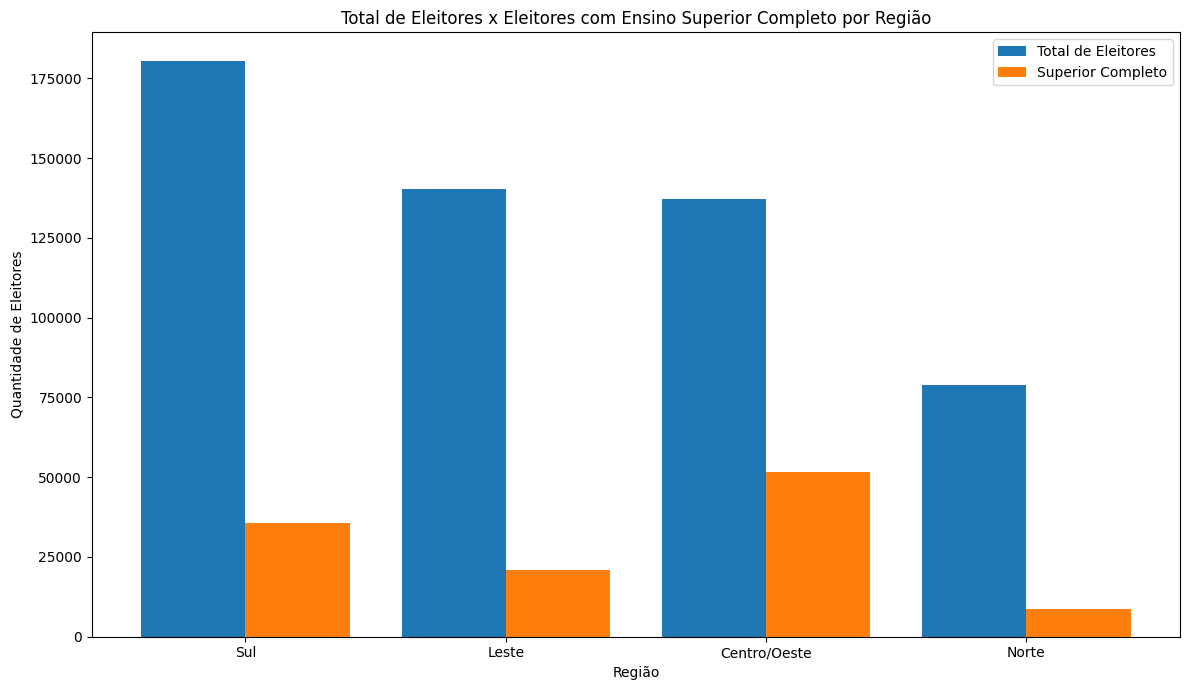

<Figure size 640x480 with 0 Axes>

In [12]:
regioes = df_plot_data['REGIAO']
total_eleitores = df_plot_data['Total de Eleitores']
superior_completo = df_plot_data['Superior Completo']

x = np.arange(len(regioes))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, total_eleitores, width, label='Total de Eleitores', color='#1f77b4')

rects2 = ax.bar(x + width/2, superior_completo, width, label='Superior Completo', color='#ff7f0e')

ax.set_title('Total de Eleitores x Eleitores com Ensino Superior Completo por Região')
ax.set_xlabel('Região')
ax.set_ylabel('Quantidade de Eleitores')
ax.set_xticks(x)
ax.set_xticklabels(regioes)
ax.legend()

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()
plt.clf()

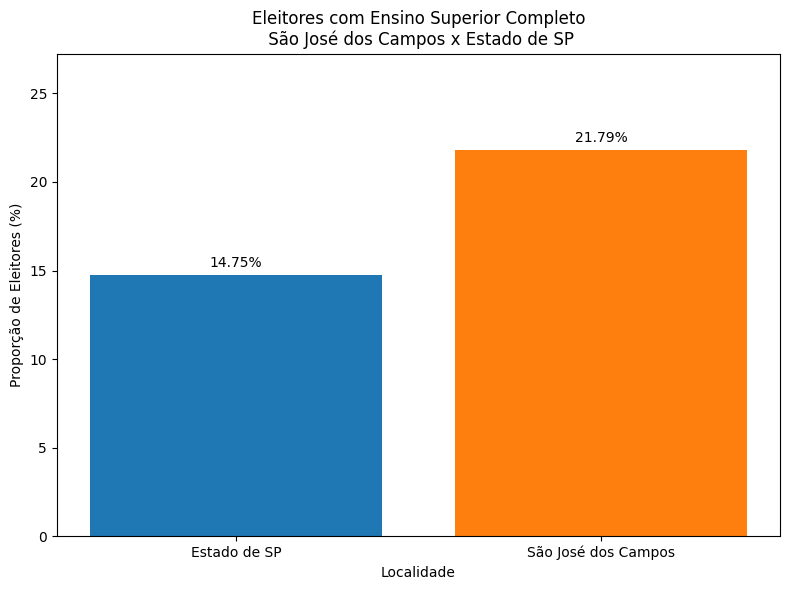

<Figure size 640x480 with 0 Axes>

In [13]:
if 'percent_estado' in locals() and 'percent_sjc' in locals() and percent_estado > 0 and percent_sjc > 0:

    localidades = [f'Estado de SP', f'São José dos Campos']
    percentuais = [percent_estado, percent_sjc]

    cores = ['#1f77b4', '#ff7f0e']

    plt.figure(figsize=(8, 6))
    barras = plt.bar(localidades, percentuais, color=cores)

    plt.title(f'Eleitores com Ensino Superior Completo\n São José dos Campos x Estado de SP')
    plt.xlabel('Localidade')
    plt.ylabel('Proporção de Eleitores (%)')

    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2.0, yval + 0.3, f'{yval:.2f}%',
                 ha='center', va='bottom')

    plt.ylim(0, max(percentuais) * 1.25)

    plt.tight_layout()

    plt.show()
    plt.clf()